# Request (Libreria 2)
<p style='text-align: justify;'>La biblioteca de solicitudes es el estándar para realizar solicitudes HTTP en Python. Resume las complejidades de realizar solicitudes detrás de comandos simples para que pueda concentrarse en interactuar con los servicios y consumir datos en su aplicación o proyecto.</p>

https://cosasdedevs.com/posts/web-scraping-con-requests-y-beautifulsoup-en-python/

In [ ]:
import requests # Como se usa anaconda, el módulo Conda trae, importa de manera automática

In [ ]:
#Trae un archivo de texto que esta publicado en internet
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')

In [ ]:
res.text

* En una utilidad de telegram es hacer mini blogs o Wikis: https://telegra.ph/Programa-2-12-15-2

In [ ]:
res1 = requests.get('https://telegra.ph/Programa-2-12-15-2')
# Trae un archivo de texto que esta publicado en internet

In [ ]:
res # Se comprueba la conexión, y responde con un codigo como: 404, 500, 200...

#### Consultar en detalle: https://developer.mozilla.org/es/docs/Web/HTTP/Status

In [ ]:
res.status_code == requests.codes.ok # Una validación según el código recibido

In [ ]:
len(res.text) # Longitud o caracteres del archivo

In [ ]:
print(res1.text) # Muestra el contenido de la página

In [ ]:
pagina=requests.get("https://gist.github.com/jsdario/1daee22f3f13fe6bc6a343f829565759#file-la_biblioteca_de_babel-txt")

In [ ]:
pagina.text

Nuestras necesidades como analistas de datos son mayores a solo descargar libros en internet o ver páginas. Un ejemplo de ello son las información de la bolsa de valores.

https://finance.yahoo.com/quote/ECOPETROL.CL/history?p=ECOPETROL.CL

#### Analíce el nombre y en la ruta de la página el siguiente detalle: Ecopetrol S.A. (EC)
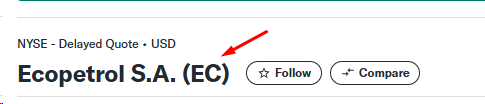

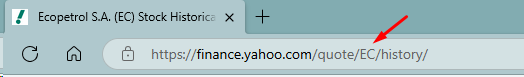
<hr>

## Filtar el informe por fechas, mostar los datos guardarlo en Excel

Al analizar la ruta de los datos tenemos
https://finance.yahoo.com/quote/EC/history/?period1=1672549200&period2=1744261200

Yahoo espera los parametros: Fecha inicial, fecha final

In [ ]:
from datetime import datetime as dt # Libreria para trabajar con fechas

In [ ]:
now=dt.utcnow() # Captura la fecha del sistema

In [ ]:
now # Imprime la fecha del sistema

In [ ]:
dt.utcnow().timestamp() # Mide el número de segundos desde una fecha determinada

### Se definen las fechas de los datos de ecopetrol

In [ ]:
start = dt.strptime('01-01-2023', '%d-%m-%Y').timestamp() # Enero de 2023 (consultar strptime)
finish = dt.strptime('01-01-2025', '%d-%m-%Y').timestamp() # Enero 01 de 2025

In [ ]:
start = int(start) # El resultado anterior esta como cadena, asi que se debe pasar a entreo
finish = int(finish)

In [ ]:
print("Fecha inicial:",start);print ("Fecha final:",finish)

In [ ]:
# Se pasan los parameros manualmente NO OPTIMO!!!
url='https://finance.yahoo.com/quote/EC/history/?period1=1672549200&period2=1735707600'

In [ ]:
# Esto esta mejor!!!
url=f'https://finance.yahoo.com/quote/EC/history/?period1={start}&period2={finish}'

In [ ]:
url

In [ ]:
import requests
from bs4 import BeautifulSoup # Libreria que extrae datos de una página, ver siguiente libro
import pandas as pd

# 1. Configurar la URL y headers (para evitar bloqueos)
url = "https://finance.yahoo.com/quote/EC/history/?period1=1672549200&period2=1744261200"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# 2. Obtener el HTML de la página
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

soup

In [ ]:
tabla = soup.select_one('table.table.noDl.yf-1jecxey')
print(tabla)

In [ ]:
# 4. Extraer filas y columnas
filas = tabla.find_all('tr')
encabezados = [th.get_text() for th in filas[0].find_all('th')]  # ['Date', 'Open', ...]
datos = []

for fila in filas[1:-1]:  # Ignorar la primera fila (headers) y la última (divisor)
    celdas = fila.find_all('td')
    datos.append([celda.get_text() for celda in celdas])

# 5. Convertir a DataFrame de pandas
df = pd.DataFrame(datos, columns=encabezados)
df.head()  # Mostrar primeras filas


In [ ]:
# Las columnas 4 y 5 tinen titulos muy extensos, asi que se arreglan:
# Renombrar columnas DIRECTAMENTE en el DataFrame
df = df.rename(columns={
    encabezados[4]: "Close",      # Columna 5 (índice 4) → "Close"
    encabezados[5]: "Adj Close"   # Columna 6 (índice 5) → "Adj Close"
})

In [ ]:
df

In [ ]:
# Opcional: Guardar en CSV
fecha = dt.fromtimestamp(finish).strftime('%d-%m-%Y') # Se convierte a fecha legible DD-MM-YYYY
df.to_csv(f'datos_ecopetrol_{fecha}.csv', index=False) # Se indica que no guarde los indices

<hr>

#### Taller:

Crear un cuaderno detallado (Jupyter Notebook o Google Colab) que analice el historial bursátil de Grupo Bimbo (BIMBOA.MX) utilizando datos de Yahoo Finanzas, con los siguientes requerimientos:
<ul>
<li>Calcular el promedio de precios de apertura
<li>Identificar la fecha del valor más alto de cierre
</ul>

In [28]:
# Iportar la libreria
import requests
import pandas as pd
from io import StringIO # Se encarga de convertir el texto en un objeto de tipo archivo

In [18]:
# Buenas practicas
'''
Como parte de las buenas practicas
a la hora de trabajar con peticiones
dentro de python

Almacenar la URL en una variable independiente
para poder pasarserla a nuestra peticion como un argumento 
y asi evitar conflictos con la conexion con la API de dicha 
URL
'''

url = "https://query1.finance.yahoo.com/v7/finance/download/BIMBOA.MX?period1=1577836800&period2=1704067200&interval=1d&events=history&includeAdjustedClose=true"

In [34]:
response_status = requests.get(url)
print(response_status.status_code) # Se debe de comprobar el estado de la peticion para poder determinar si es Exitosa o No

429


# Status Code 
Se evidencia que tenemos un codigo de estado 429 lo 
cual indica que el cliente a enviado un numero excesivo de peticiones
en un corto tiempo el cual excede el limite impuesto por el servidor 
para evitar errores. 

## Solucion 
Simular un Navegador usando cabeceras, por que el API de Yhaoo no es 
una API  publica y detecto muchas peticiones desde mi IP.

In [39]:
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36 Edg/135.0.0.0'
}

In [40]:
reponse = requests.get(url, headers=headers)
print(response.status_code)

429
